## Esercizio 1

1. Crea un vettore NumPy con i seguenti **canoni mensili d'affitto** (in euro) per 4 appartamenti: **720, 980, 650, 1200**

2. Calcola la **spesa totale mensile** sostenuta dagli inquilini.

3. Il proprietario dell'appartamento da **1200 €** decide di **aumentare l’affitto del 12%**.
    - Modifica il vettore per applicare l’aumento.
    - L’importo aggiornato deve essere esattamente **1344,00 €**, controlla se appare **esattamente** nel tuo array.


4. L'inquilino dell'appartamento da **650 €** ottiene uno **sconto del 10%**.
    - Applica la modifica.

5. Gli altri due appartamenti (**720 € e 980 €**) subiscono un **aumento del 5%**.
    - Aggiorna il vettore di conseguenza.

7. Calcola la **nuova spesa totale mensile** dopo tutti i cambiamenti.

8. Infine: quanto ha influito **l’aumento dell’affitto più alto** sulla spesa complessiva?

    (Suggerimento: confronta la spesa totale **prima di qualsiasi modifica** e **dopo il solo aumento del canone a 1200 €**.)


In [12]:
import numpy as np

x = np.array ([720, 980, 650, 1200])
spesaTot = sum(x)
print(spesaTot)

x = np.where(x == 1200, 1200 + (1200*12/100), x)
print(x == 1344)
spesaDopoPrimo = sum(x)

print(spesaDopoPrimo)
x = np.where(x == 650, 650 - (650*10/100), x)
print(x)

x = np.where(x == 720, 720 + (720*5/100), x)
x = np.where(x == 980, 980 + (980*5/100), x)
print(x)

nuovaSpesaTot = sum(x)
print(nuovaSpesaTot)

inf = spesaDopoPrimo - spesaTot
print(inf)


3550
[False False False  True]
3694.0
[ 720.  980.  585. 1344.]
[ 756. 1029.  585. 1344.]
3714.0
144.0


## Esercizio 2

Consideriamo un semplice processo di random walk (cammino aleatorio) in una dimensione:
a ogni passo temporale, un camminatore si sposta a destra (+1) o a sinistra (-1) con uguale probabilità. Supponiamo che il camminatore parta sempre da x=0.

1. Scrivi una funzione che simula il cammino per n passi ed N camminatori e restituisce due array. Il primo rappresenta la media della posizione ad ogni passo degli N camminatori ed il secondo la deviazione standard della posizione ad ogni passo degli N camminatori.

2. Fai prima il plot della media delle posizione degli N camminatori per 100 passi 

3. Fai il plot con anche la devizione standard.  La deviazione standard diminuisce all'aumentare del campione? Che andamento ha la deviazione standard rispeto l tempo/passi?

C:\Users\hp\AppData\Local\Temp\ipykernel_20704\3497870970.py:19: RuntimeWarning: divide by zero encountered in scalar power
  devCamm = ((sum(sumForDev - mediaCamm)**(2))/n)**(-2)


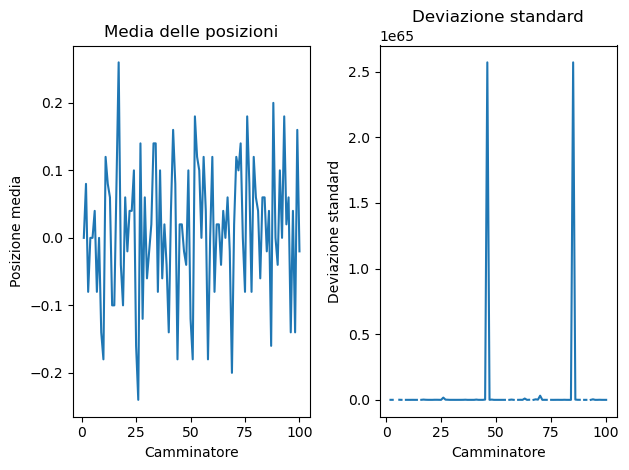

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def random_walk(n, N):
    mediaPos = np.zeros(N)
    devStanPos = np.zeros(N)
    for camminatore in range (N):
        mediaCamm = 0
        sumForDev = np.zeros(n)
        for passo in range (n):
            valPasso = np.random.choice([-1, 1], replace=False)
            mediaCamm = mediaCamm + valPasso
            sumForDev[passo] = valPasso

        mediaCamm = mediaCamm/n
        mediaPos[camminatore] = mediaCamm

        devCamm = ((sum(sumForDev - mediaCamm)**(2))/n)**(0.5)
        devStanPos[camminatore] = devCamm
    return mediaPos, devStanPos

mediaPos, devStanPos = random_walk(100, 100)
plt.subplot(1, 2, 1) 
plt.plot(range(1, 101), mediaPos)
plt.title("Media delle posizioni")
plt.xlabel("Camminatore")
plt.ylabel("Posizione media")

plt.subplot(1, 2, 2)  
plt.plot(range(1, 101), devStanPos)
plt.title("Deviazione standard")
plt.xlabel("Camminatore")
plt.ylabel("Deviazione standard")

plt.tight_layout()  
plt.show()




## Esercizio 3

Genera un array `a` di dimensioni **5 x 9** contenente numeri da una distribuzione gaussiana con media 0 e dev standard 1.  
Per ogni riga, seleziona il numero **più vicino a 0.1**.
Imposta il seed per la riproducibilità `np.random.seed(42)`

 *Suggerimento*: per ottenere `a[i, j]`, l'array `i` deve contenere gli **indici di riga** corrispondenti agli elementi in `j`.

In [ ]:
import numpy as np
np.random.seed(42)
a = np.random.normal(size=(5, 9))

numeriSel = np.zeros(5)
for i in range(5):
    riga = a[i,]
    diff = np.abs(riga - 0.1)
    numeriSel[i] = riga[np.argmin(diff)]  
print(a)
print(numeriSel)


[[0.37454012 0.95071431 0.73199394 0.59865848 0.15601864 0.15599452
  0.05808361 0.86617615 0.60111501]
 [0.70807258 0.02058449 0.96990985 0.83244264 0.21233911 0.18182497
  0.18340451 0.30424224 0.52475643]
 [0.43194502 0.29122914 0.61185289 0.13949386 0.29214465 0.36636184
  0.45606998 0.78517596 0.19967378]
 [0.51423444 0.59241457 0.04645041 0.60754485 0.17052412 0.06505159
  0.94888554 0.96563203 0.80839735]
 [0.30461377 0.09767211 0.68423303 0.44015249 0.12203823 0.49517691
  0.03438852 0.9093204  0.25877998]]
[0.05808361 0.02058449 0.13949386 0.06505159 0.09767211]


## Esercizio 4

Utilizza il dataset `titanic`, disponibile all'url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"

Esegui un’analisi esplorativa sui dati dei passeggeri, focalizzandoti su tariffe, età e componenti familiari.

1. **Visualizza i primi 10 passeggeri ordinati per tariffa pagata** (`Fare`), dal più alto al più basso.

2. **Calcola la media** di:
   - `Age` (età)
   - `Fare` (tariffa)
   - `SibSp` (numero di fratelli/coniugi a bordo)

3. **Crea una nuova colonna** chiamata `Family_index`, definita come:

   $$
   \texttt{family\_index} = \frac{\texttt{sibsp} + \texttt{parch}}{\texttt{fare}}
   $$

   *(Indicatore del “peso familiare” per unità di spesa – attenzione a eventuali divisioni per zero!)*

4. Trova il **passeggero con il valore massimo** di `Family_index`.

5. **Filtra solo i passeggeri** che hanno pagato **più di 100** di tariffa (`Fare > 100`).

6. **Crea un grafico a barre** con i 10 passeggeri che hanno pagato di più (`Fare`).

7. **Crea un grafico a linee** dell’età (`Age`), ordinando i passeggeri per tariffa (`Fare`) crescente.



💡 *Suggerimenti*:
- Ricordati di gestire eventuali valori mancanti in `Age` o `Fare` prima di fare operazioni.

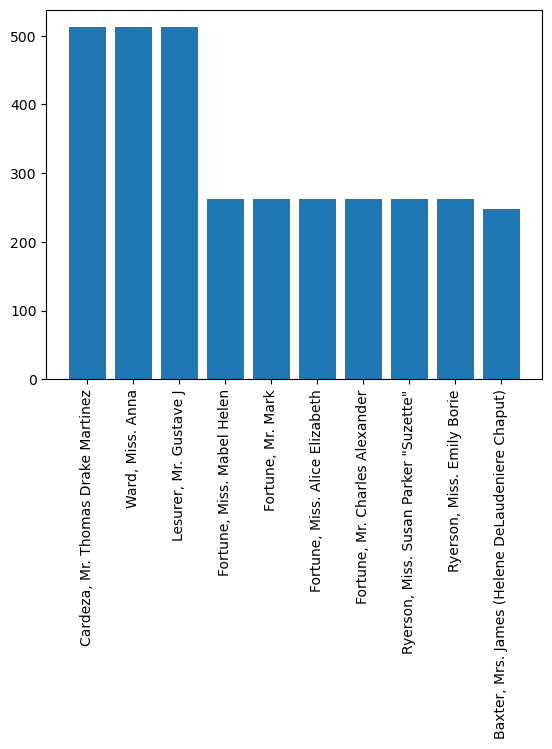

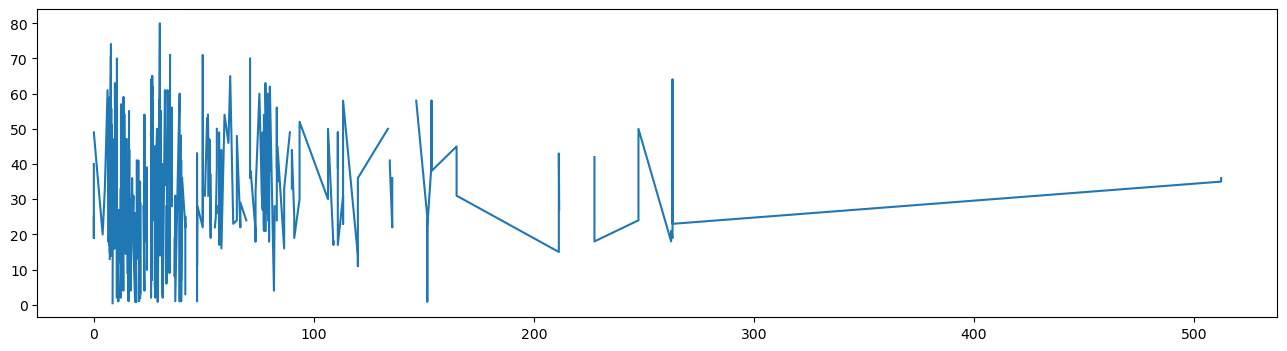

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

url ="https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

#1)
#df = df.sort_values(by="Fare", ascending=False)
df.head(10)

#2)
df["Age"].mean()
df["Fare"].mean()
df["SibSp"].mean()

#3)
df["Family_index"] = ((df["Parch"] + df["SibSp"])/(df["Fare"])).replace(np.nan,0)

#4)
idMax = df["Family_index"].idxmax() #Troviamo ID Passeggero cercato
df.iloc[idMax]
#.iloc per numero. .loc etichetta (in questo caso corretto (ordinato discendente passengerId))
#altrimenti. loc torna sempre corretto, iloc prende n-sima riga indipendentemente da ordine

#5)
df[df["Fare"] > 100 ]

#6)
cf = df.sort_values(by="Fare", ascending=False)
cf = cf.head(10)

plt.bar(cf["Name"], cf["Fare"])
plt.xticks(rotation=90)
plt.show()

#7)
ef = df.sort_values(by="Fare", ascending=False)
plt.figure(figsize=(16,4)) #aumento grandezza disegno (x,y. 16 = max)
plt.plot(ef["Fare"], ef["Age"])
plt.show()


## Esercizio 5

Usa il dataset `penguins`, disponibile tramite `seaborn.load_dataset("penguins")`.


1. Quante righe e colonne ha il dataset?

2. Controlla quanti valori mancanti ci sono per colonna.

3. Riempi i valori mancanti nella colonna `sex` con il valore più frequente.

4. Rimuovi le righe in cui il valore `body_mass_g` è mancante.

5. Controlla se ci sono righe duplicate.

6. Calcola la **massa corporea media** (`body_mass_g`) per ogni specie (`species`).
  Se ci sono valori mancanti in `body_mass_g`, riempili con la media della specie.

7. Visualizza la **distribuzione della massa corporea** (`body_mass_g`) per specie.

8.  Visualizza la **distribuzione della massa corporea** per specie, **dividendo per sesso** (`sex`) e mostrandoli a confronto.


💡 Suggerimento: usa `seaborn.violinplot()`, `boxplot()` o `kdeplot()` con `hue='sex'`.


C:\Users\hp\AppData\Local\Temp\ipykernel_6468\3151800305.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['sex'].fillna(most_frequent_sex, inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_6468\3151800305.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example,

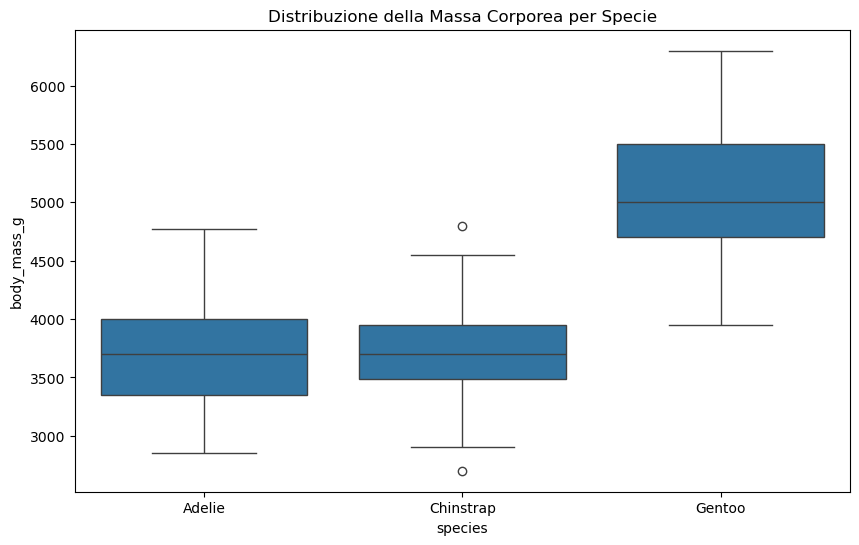

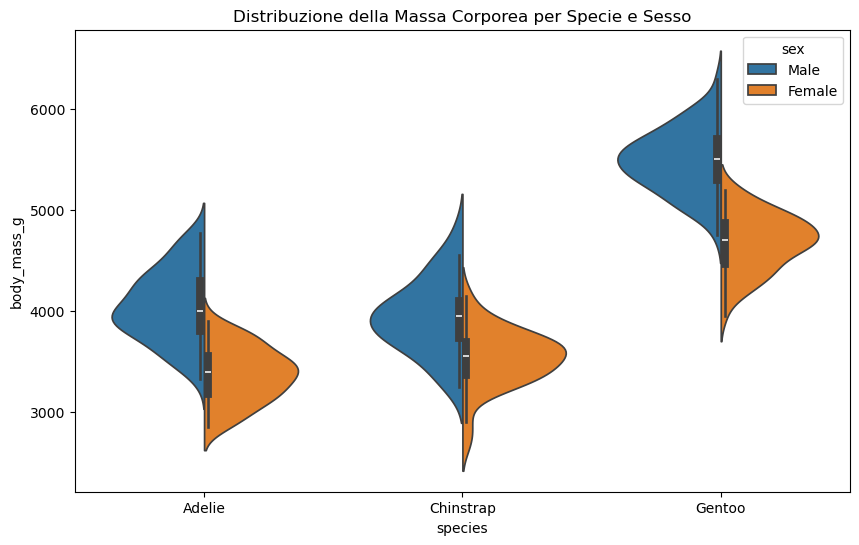

In [86]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = sns.load_dataset("penguins")
#1
df.shape
#2
df.isna().sum() #considera sia NUll, Nan e altro
#3
most_frequent_sex = df['sex'].mode() 
df['sex'].fillna(most_frequent_sex, inplace=True)
#4
df.dropna(subset=['body_mass_g'], inplace=True) #toglie colonne dove bodymass é Na
#5
df.duplicated().sum()
#6
mean_body_mass = df.groupby('species')['body_mass_g'].mean()
df['body_mass_g'].fillna(mean_body_mass, inplace=True)
#7
plt.figure(figsize=(10, 6))#dimensione
sns.boxplot(data=df, x='species', y='body_mass_g') # = (x=df["species"]...)
plt.title('Distribuzione della Massa Corporea per Specie')
plt.show()
#8
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='species', y='body_mass_g', hue='sex', split=True)
plt.title('Distribuzione della Massa Corporea per Specie e Sesso')
plt.show()


## Esercizio 6

Hai due array NumPy generati come segue:

`x = np.linspace(0, 10, 100)`  
`y = 3 * x + 2 + np.random.normal(0, 1, 100)`

Scrivi una funzione `fit_line(x, y)` che:

- usa `scipy.optimize.curve_fit` per eseguire un **fitting lineare** del tipo `y = a * x + b`;  
- restituisce una tupla contenente:
  - i **parametri ottimizzati** `a` e `b`;  
  - una **stringa** che descrive la retta trovata, ad esempio: `"y = 3.02 * x + 1.95"`.


Esempio di output atteso:   (3.02, 1.95, "y = 3.02 * x + 1.95")

Fai un esempio di utilizzo dove poi plotti i dati e la curva ottenuta.


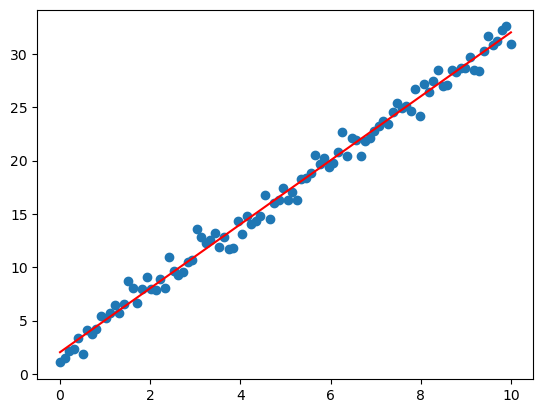

y = 3.00 * x + 2.03


In [5]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

x = np.linspace(0, 10, 100)  #genera numeri da 0 a 10, 100 punti generati
y = 3 * x + 2 + np.random.normal(0, 1, 100) #media varianza npunti. rumore

def funzione (x, a, b): #definiamo la funzione
    return a*x +b

#"y = {}*x + {}".format(a,b)
def fit_line(x,y):
    parametri, _ = sc.optimize.curve_fit(funzione, x, y) #passiamo funzione, x, y. ci ritorna a e b ottimizati per minor errore possibile
    #paramentri contiene a e b, il secondo elemento conterrebbe la stringa, ma la ignoriamo con _
    #genera retta più vicina a tutti i punti (scarto quadratico medio minore possinili)
    a = parametri[0]
    b = parametri[1]
    return a, b

plt.scatter(x,y) #grafico dei punti generati
plt.plot(x, fit_line(x,y)[0]*x + fit_line(x,y)[1], color="red") #x, la y la calcoliamo (y=ax +b). fatta da fit_line
plt.show()
print(f"y = {fit_line(x, y)[0]:.2f} * x + {fit_line(x, y)[1]:.2f}")